#Projection Methods: Principal Component Analysis

In [2]:
using DataFrames
using PyPlot

##2.1 PCA: 2-dimensional Toy Data (2 points)

(a) Load the dataset pca-data-2d.dat and make a scatter plot of the centered data.


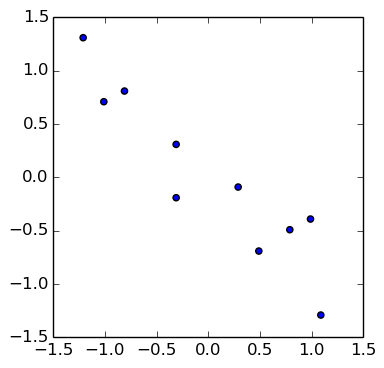

In [4]:
# read
df = readtable("pca-data-2d.dat", separator=' ', header=false)

# center
function center(df::DataFrame)
    return DataFrame(colwise(x -> x .- mean(x), df))
end

df = center(df)
Xt = array(df)

# plot
figure(figsize=(4, 4))
scatter(df[:x1], df[:x2]);

(b) Determine the Principal Component Directions (PCs) and make another scatter plot of the
same data points in the coordinate system spanned by the 2 PCs.

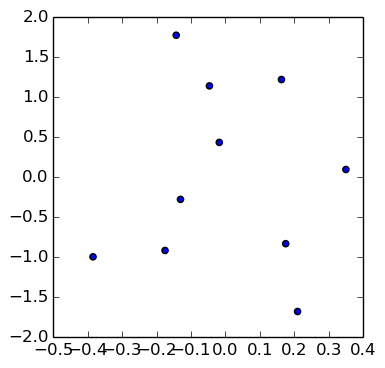

In [5]:
# determine covariance matrix
C = cov(Xt)
λ, E = eig(C)

# project data in new coordinate system
dnew = Xt * E

# plot
figure(figsize=(4, 4))
scatter(dnew[:,1], dnew[:,2]);

(c) PCA can be used to compress data e.g. using only information contained in the first j out
of N PCs. Plot the reconstruction of the data in the original coordinate system when using
only the first or the second PC for reconstruction.

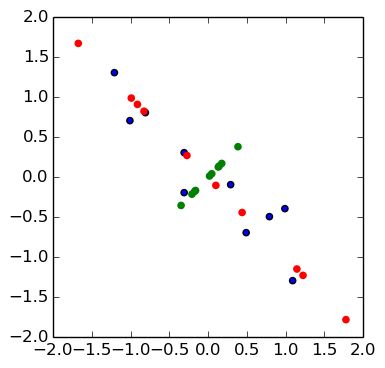

In [6]:
p1 = Xt * E[:,1]
p2 = Xt * E[:,2]

# plot
figure(figsize=(4, 4))
scatter(df[:x1], df[:x2]);
scatter(p2, -p2, color="r");
scatter(-p1, -p1, color="g");

##2.2 PCA: 3-dimensional Toy Data (2 points)

(a) Load the dataset pca-data-3d.txt, center it, and show the scatterplot matrix.

In [7]:
function plot_scattermat(df, rows, cols)
    figure(figsize=(rows,cols))
    for i in 1:rows, j in 1:cols
        subplot(rows, cols, rows * (i-1) + j)
        if (i != j)
            scatter(df[:,i], df[:,j], s=1)
        else
            n, bins, patches = PyPlot.hist(df[:,i], bins=10, normed=1, histtype="bar")
            PyPlot.setp(patches, "facecolor", "black", "alpha", 0.5)
        end
        axis("off")
    end
end

plot_scattermat (generic function with 1 method)

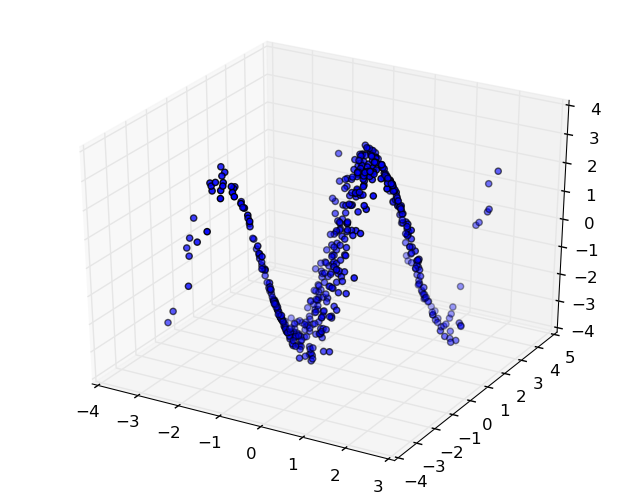

In [8]:
df = readtable("pca-data-3d.txt")
df = center(df)

Xt = array(df)

scatter3D(df[:x1], df[:x2], df[:x3]);

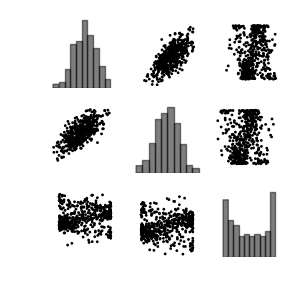

In [9]:
plot_scattermat(Xt, 3, 3)

(b) Determine the PCs and make the analogous scatterplot matrix for the 2d-coordinate systems
spanned by the different pairs of PCs.

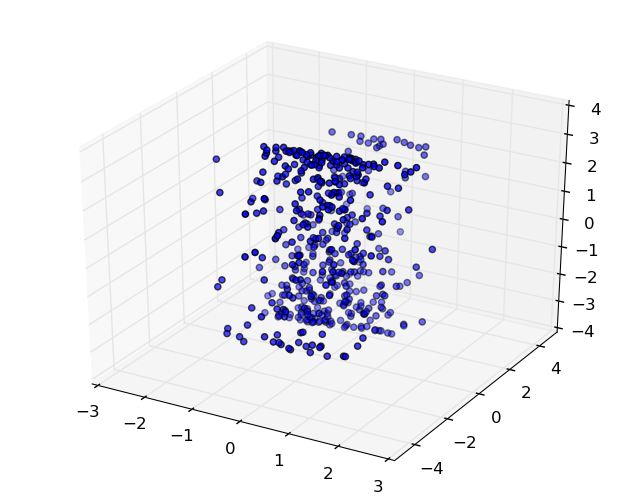

In [10]:
# determine covariance matrix
C = cov(Xt)
λ, E = eig(C)

# project data in new coordinate system
dnew = Xt * E

# plot
scatter3D(dnew[:,1], dnew[:,2], dnew[:,3]);

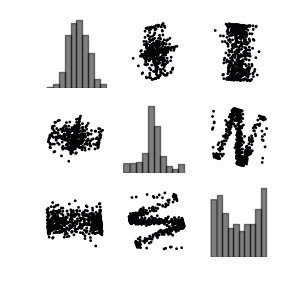

In [11]:
plot_scattermat(dnew, 3, 3)

## 2.3 Projections of a dynamical system (4 points)

Using the data from the file expDat.txt, we can interpret the data as describing the process
of a ”large” system with d=20 dimensions at each timepoint.

In [12]:
df = readtable("expDat.txt")
df = center(df)
Xt = array(df)[:,2:21];

(a) Find the 20 principal components of this dataset

In [13]:
C = cov(Xt)
λ, E = eig(C);

(b) Plot the temporal evolution of the system by making a scatterplot of the 100 datapoints
projected onto the first 2 PCs. Use color to indicate the time index.

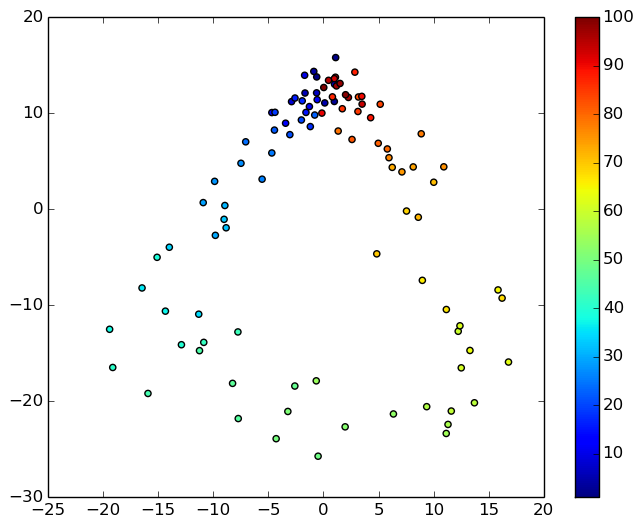

In [14]:
a, b = size(E)
# project data in new coordinate system
dnew = Xt * E[:,b-1:b]
scatter(dnew[:,1], dnew[:,2], c = 1:100)
colorbar();

(c) create a new dataset by shuffling the data (i.e. reorder the 100 data points for each of the 20
columns in a different sequence).

In [15]:
Xtc = zeros(Xt)
for i in 1:20
    Xtc[:,i] = shuffle(Xt[:,i])
end

(d) Plot the covariance matrices and screeplots for both the original and the scrambled data and
interpret your results.

In [16]:
function plotCovMat(C::Array, t::String, a, b, c, min, max)
    subplot(a, b, c)
    imshow(C, interpolation="nearest")
    clim(min,max)
    title(t)
    axis("off")
end

plotCovMat (generic function with 1 method)

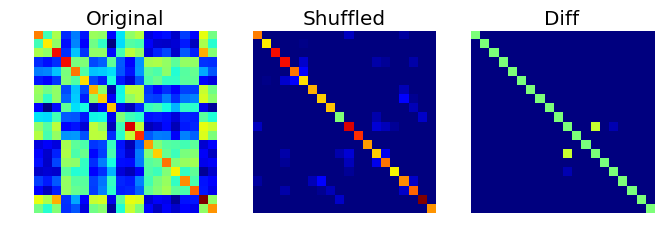

In [17]:
min, max = extrema(C)
C2 = cov(Xtc)
λ2, E2 = eig(C2);
plotCovMat(C, "Original", 1, 3, 1, min, max)
plotCovMat(C2, "Shuffled", 1, 3, 2, min, max)
plotCovMat(C2-C, "Diff", 1, 3, 3, -.5, .5);

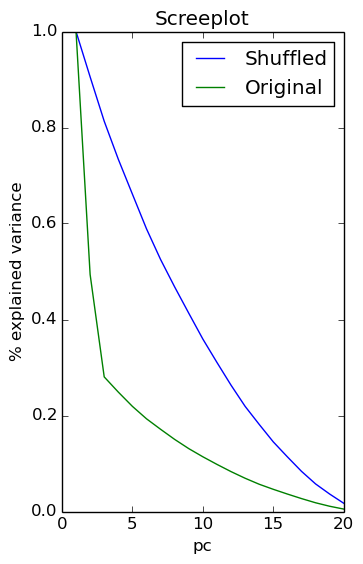

PyObject <matplotlib.text.Text object at 0x7efc41d13810>

In [18]:
subplot(121)
plot(1:20, reverse(cumsum(λ2)) / sum(λ2))
subplot(121)
plot(1:20, reverse(cumsum(λ))/ sum(λ))
title("Screeplot")
legend(["Shuffled", "Original"])
xlabel("pc")
ylabel("% explained variance")

The covariance in the shuffled data vanishes because the datapoints are not changing together anymore. This is represented in the screeplot, where there is no dimension that seems to be espacially helpful in explaining a big part of the variance. In the original data, we can see that with as few as 4 PCs we can explain already 75% of the variance.

## 2.4 PCA: Image Data (2 points)

The file imgpca.zip contains different categories of training images. For pictures from each
of the categories nature (prefix n) and buildings (prefix b) do the following:

In [19]:
function sampleImages(prefix)
    files = filter(x -> startswith(x, prefix), readdir(abspath("imgpca")))
    N = length(files)
    n = ceil(5000 / N)
    psize = 16
    patches = zeros(5000, 256)

    idx = 1
    for f in files
        img = imread("imgpca/$f")
        s = size(img)
        h = s[2]
        w = s[1]
            
        # randomly sample n patches
        for i in 1:n
            x = sample(1:w-psize-1)
            y = sample(1:h-psize-1)
            patch = img[x:(x+psize-1), y:(y+psize-1)]
            patches[idx,:] = patch[:]
            idx = idx + 1
            if idx > 5000
                break
            end
        end
    end
    
    return patches
end      

sampleImages (generic function with 1 method)

(a) Sample a total of at least N=5000 patches (e.g. 500 per image) of 16x16 pixels from this set
of images and assemble them in a big Nx256 matrix.

In [20]:
buildings = sampleImages('b')
nature = sampleImages('n');

(b) Calculate the PCs of these image patches and show the first 24 as 16x16 image patches. Are
there differences between the PCs for buildings vs. nature? How many PCs should you keep
for each of the image groups?

In [21]:
function showFirst(E)
    figure(figsize=(4,4))
    idx = 1
    a, b = size(E)
    for i in 1:4, j in 1:6
        patch = reshape(E[:,b-idx], (16,16))
        #plot
        subplot(4, 6, idx)
        imshow(patch, cmap = get_cmap("binary"), interpolation="bicubic")
        axis("off")
        idx = idx+1
    end
end

showFirst (generic function with 1 method)

In [22]:
# center
buildings = buildings .- mean(buildings, 1)
nature = nature .- mean(nature, 1)

# cov matrix
Cb = cov(buildings)
Cn = cov(nature)

# eigenvalues
λb, Eb = eig(Cb);
λn, En = eig(Cn);

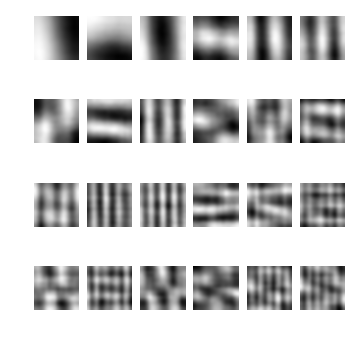

In [23]:
showFirst(Eb)

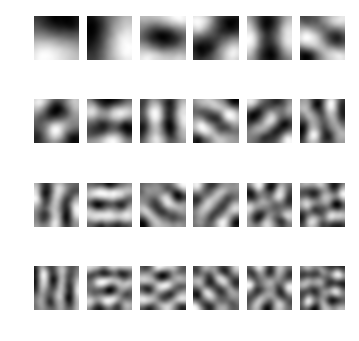

In [24]:
showFirst(En)

The PCs show differnces in that buildings seem to have more clear cut grating features while natural images lead to more "organic" shaped components. It seems enough to keep half of the features since the last features appear to capture a lot of noise.